# COVID-19 Auswertung - Impfungen


## import libraries

In [544]:
Programm_Name = "Impfungen" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [545]:
Laufwerk = "D:\\"
pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

name_input = "Impfquotenmonitoring.xlsx"
name_input2 = "02-bundeslaender.xlsx"

name_7 = "plot_7_Impfquote_ger.png" # Impfquote Deutschland Bundesländer
name_7_2 = "plot_7-2_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_3 = "plot_7-3_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_4 = "plot_7-4_Impfungen_kumuliert_Timeseries_ger.png" # Impfungen Timeseries Deutschland

name_output_df_EW = 'Dataframes\\df_EW.csv'
name_output_df_I = 'Dataframes\\df_I.csv'
name_output_df_I_EW = 'Dataframes\\df_I_EW.csv'
name_output_df_I_TS = 'Dataframes\\df_I_TS.csv'

name_performance = 'Dataframes\\df_performance.csv'

### Speicherorte und Dateinamen Plots

In [546]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import matplotlib.dates as mdates
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime, timedelta
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

In [547]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [548]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.3
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [549]:
pE = 100_000

## Länder Farben

In [550]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange


### Einwohnerzahlen

In [551]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000


# Preprocessing Dataframes

In [552]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

In [553]:
# Datenimport Einwohnerdaten Bundesländer
df_EW = pd.read_excel(Laufwerk + pfad_input + name_input2,
                     sheet_name="Bundesländer_mit_Hauptstädten",
                     usecols="A:G",
                     skiprows=6)


# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][2]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen


# Datenimport Impfungen
df_I = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:V")




In [554]:
df_I.head(3)

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen der niedergelassenen Ärzteschaft,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,eine Impfung,NaN,NaN,NaN,NaN,vollständig geimpft,NaN,NaN,...,eine Impfung,NaN,NaN,NaN,NaN,vollständig geimpft,NaN,NaN,NaN,NaN
1,NaN,NaN,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,...,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag
2,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,...,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN


## preprocessing

In [555]:
print(datetime. today())
ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
print(ts)

2021-04-12 23:36:09.402978
2020-11-23 23:36:09.402978+00:00


### df_I (Impfdaten pro Bundesland)

In [556]:
df_I.head(7)

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen der niedergelassenen Ärzteschaft,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,eine Impfung,NaN,NaN,NaN,NaN,vollständig geimpft,NaN,NaN,...,eine Impfung,NaN,NaN,NaN,NaN,vollständig geimpft,NaN,NaN,NaN,NaN
1,NaN,NaN,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,...,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag
2,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,...,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN
3,8.0,Baden-Württemberg,1571723,974876,80959,515888,26654,657235,621997,35086,...,129527,126770,6,2751,1148,4045,4043,0,2,0
4,9.0,Bayern,1917361,1306153,106239,504969,41017,853848,808440,45290,...,178473,144647,98,33728,441,284,266,0,18,1
5,11.0,Berlin,551607,336123,49753,165731,9939,265456,247823,17633,...,43397,31217,7,12173,180,75,58,0,17,0
6,12.0,Brandenburg,359843,224350,34568,100925,543,133196,126110,7082,...,48473,41158,0,7315,25,2726,2722,0,4,0


In [557]:
# df_I = df_I.drop(columns=['Insgesamt über alle Impfstellen',
#                          '','','','','','','','','','','','','','','',''])


In [558]:
df_I = df_I.iloc[3:19]   # drop rows

In [559]:
# list(df_I)

In [560]:
df_I

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen der niedergelassenen Ärzteschaft,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
3,8.0,Baden-Württemberg,1571723,974876,80959,515888,26654,657235,621997,35086,...,129527,126770,6,2751,1148,4045,4043,0,2,0
4,9.0,Bayern,1917361,1306153,106239,504969,41017,853848,808440,45290,...,178473,144647,98,33728,441,284,266,0,18,1
5,11.0,Berlin,551607,336123,49753,165731,9939,265456,247823,17633,...,43397,31217,7,12173,180,75,58,0,17,0
6,12.0,Brandenburg,359843,224350,34568,100925,543,133196,126110,7082,...,48473,41158,0,7315,25,2726,2722,0,4,0
7,4.0,Bremen,123531,82062,7611,33858,2525,42160,39118,3038,...,6956,6956,0,0,0,7,7,0,0,0
8,2.0,Hamburg,272586,190514,13574,68498,6421,105748,99166,6529,...,17012,13460,18,3534,28,25,23,0,2,2
9,6.0,Hessen,854064,547304,40023,266737,14489,411000,394057,16830,...,66770,63451,16,3303,298,120,120,0,0,0
10,13.0,Mecklenburg-Vorpommern,207426,145347,16743,45336,629,90024,83802,6130,...,23946,21085,6,2855,98,64,60,0,4,2
11,3.0,Niedersachsen,1120835,712430,79866,328539,5398,468441,449212,18783,...,88501,88150,56,295,263,181,170,11,0,0
12,5.0,Nordrhein-Westfalen,2663674,1621866,115003,926805,55120,1038760,1005518,31953,...,228445,200059,594,27792,1829,651,568,77,6,8


In [561]:
df_I = df_I.drop(columns=['Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern ',
                          'Unnamed: 6',
                          'Unnamed: 7',
                          'Unnamed: 11',
                          'Impfungen der niedergelassenen Ärzteschaft',
                          'Unnamed: 16',
                          'Unnamed: 17',
                          'Unnamed: 21',
                          'RS'])

In [562]:
df_I.head(1)

,Bundesland,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,Baden-Württemberg,974876,80959,515888,621997,35086,152,126770,6,2751,4043,0,2


### Erstimpfungen ermitteln

In [563]:
# rename columns
df_I.rename(columns= {"Unnamed: 3": "BioNTech_EI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 4": "Moderna_EI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 5": "AstraZeneca_EI_1"},inplace=True)

df_I.rename(columns= {"Unnamed: 13": "BioNTech_EI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 14": "Moderna_EI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 15": "AstraZeneca_EI_2"},inplace=True)
# df_I.head(1)


# berechnen um die Summe der EI ZI zu bekommen
df_I["BioNTech_EI"] = df_I["BioNTech_EI_1"] + df_I["BioNTech_EI_2"]
df_I["Moderna_EI"] = df_I["Moderna_EI_1"] + df_I["Moderna_EI_2"]
df_I["AstraZeneca_EI"] = df_I["AstraZeneca_EI_1"] + df_I["AstraZeneca_EI_2"]
df_I["Summe_EI"] = df_I["BioNTech_EI"] + df_I["Moderna_EI"] + df_I["AstraZeneca_EI"]


# drop columns 
df_I = df_I.drop(columns=['BioNTech_EI_1',
                          'Moderna_EI_1',
                          'AstraZeneca_EI_1',
                          'BioNTech_EI_2',
                          'Moderna_EI_2',
                          'AstraZeneca_EI_2'])
df_I

,Bundesland,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 18,Unnamed: 19,Unnamed: 20,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI
3,Baden-Württemberg,621997,35086,152,4043,0,2,1101646,80965,518639,1701250
4,Bayern,808440,45290,118,266,0,18,1450800,106337,538697,2095834
5,Berlin,247823,17633,0,58,0,17,367340,49760,177904,595004
6,Brandenburg,126110,7082,4,2722,0,4,265508,34568,108240,408316
7,Bremen,39118,3038,4,7,0,0,89018,7611,33858,130487
8,Hamburg,99166,6529,53,23,0,2,203974,13592,72032,289598
9,Hessen,394057,16830,113,120,0,0,610755,40039,270040,920834
10,Mecklenburg-Vorpommern,83802,6130,92,60,0,4,166432,16749,48191,231372
11,Niedersachsen,449212,18783,446,170,11,0,800580,79922,328834,1209336
12,Nordrhein-Westfalen,1005518,31953,1289,568,77,6,1821925,115597,954597,2892119


### Zweitimpfungen ermitteln

In [564]:
# rename columns
df_I.rename(columns= {"Unnamed: 8": "BioNTech_ZI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 9": "Moderna_ZI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 10": "AstraZeneca_ZI_1"},inplace=True)

df_I.rename(columns= {"Unnamed: 18": "BioNTech_ZI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 19": "Moderna_ZI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 20": "AstraZeneca_ZI_2"},inplace=True)
df_I.head(1)

# berechnen um die Summe der EI ZI zu bekommen
df_I["BioNTech_ZI"] = df_I["BioNTech_ZI_1"] + df_I["BioNTech_ZI_2"]
df_I["Moderna_ZI"] = df_I["Moderna_ZI_1"] + df_I["Moderna_ZI_2"]
df_I["AstraZeneca_ZI"] = df_I["AstraZeneca_ZI_1"] + df_I["AstraZeneca_ZI_2"]
df_I["Summe_ZI"] = df_I["BioNTech_ZI"] + df_I["Moderna_ZI"] + df_I["AstraZeneca_ZI"]

# drop columns 
df_I = df_I.drop(columns=['BioNTech_ZI_1',
                          'Moderna_ZI_1',
                          'AstraZeneca_ZI_1',
                          'BioNTech_ZI_2',
                          'Moderna_ZI_2',
                          'AstraZeneca_ZI_2'])
df_I

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Summe_ZI
3,Baden-Württemberg,1101646,80965,518639,1701250,626040,35086,154,661280
4,Bayern,1450800,106337,538697,2095834,808706,45290,136,854132
5,Berlin,367340,49760,177904,595004,247881,17633,17,265531
6,Brandenburg,265508,34568,108240,408316,128832,7082,8,135922
7,Bremen,89018,7611,33858,130487,39125,3038,4,42167
8,Hamburg,203974,13592,72032,289598,99189,6529,55,105773
9,Hessen,610755,40039,270040,920834,394177,16830,113,411120
10,Mecklenburg-Vorpommern,166432,16749,48191,231372,83862,6130,96,90088
11,Niedersachsen,800580,79922,328834,1209336,449382,18794,446,468622
12,Nordrhein-Westfalen,1821925,115597,954597,2892119,1006086,32030,1295,1039411


In [565]:
df_I["Bundesland"] = df_I["Bundesland"].replace({'\*': ''}, regex=True)
df_I

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Summe_ZI
3,Baden-Württemberg,1101646,80965,518639,1701250,626040,35086,154,661280
4,Bayern,1450800,106337,538697,2095834,808706,45290,136,854132
5,Berlin,367340,49760,177904,595004,247881,17633,17,265531
6,Brandenburg,265508,34568,108240,408316,128832,7082,8,135922
7,Bremen,89018,7611,33858,130487,39125,3038,4,42167
8,Hamburg,203974,13592,72032,289598,99189,6529,55,105773
9,Hessen,610755,40039,270040,920834,394177,16830,113,411120
10,Mecklenburg-Vorpommern,166432,16749,48191,231372,83862,6130,96,90088
11,Niedersachsen,800580,79922,328834,1209336,449382,18794,446,468622
12,Nordrhein-Westfalen,1821925,115597,954597,2892119,1006086,32030,1295,1039411


### df_EW (Einwohnerdaten pro Bundesland)   OK

In [566]:
# Spalten Überschriften definieren 
df_EW.rename(columns= {"Unnamed: 0": "Bundesland"},inplace=True)
df_EW.rename(columns= {"Unnamed: 1": "Stadt"},inplace=True)
df_EW.rename(columns= {"Unnamed: 2": "Fläche"},inplace=True)
df_EW.rename(columns= {"Unnamed: 3": "Einwohner"},inplace=True)
df_EW.rename(columns= {"Unnamed: 4": "Einwohner_M"},inplace=True)
df_EW.rename(columns= {"Unnamed: 5": "Einwohner_F"},inplace=True)
df_EW.rename(columns= {"Unnamed: 6": "Einwohner_pro_km²"},inplace=True)

# nicht gebrauchte columns löschen
df_EW = df_EW.drop(columns=['Stadt','Einwohner_M','Einwohner_F','Einwohner_pro_km²'])

# Rechnen
df_EW["Einwohner_pro_km²"] = df_EW["Einwohner"]/df_EW["Fläche"]

# alles löschen was keine Bundesländer sind
df_EW["Bundesland"] = df_EW["Bundesland"].fillna("x")      # ersetze alle NaN Werte mit x
df_EW["Fläche"] = df_EW["Fläche"].fillna("x")              # ersetze alle NaN Werte mit x
indexNames = df_EW[ df_EW['Bundesland'] == "x" ].index     # alle Index Werte mit "x" in eine Variable schreiben
df_EW.drop(indexNames , inplace=True)                      # lösche diese Index rows vom dataframe
indexNames = df_EW[ df_EW['Fläche'] == "x" ].index         # wiederholen
df_EW.drop(indexNames , inplace=True)                      # wiederholen


# Bundesland erste 3 Zeichen entfernen
df_EW["Bundesland"] = df_EW["Bundesland"].str[3:]

# Datentyp in float ändern
df_EW["Fläche"] = pd.to_numeric(df_EW["Fläche"], errors='coerce')

#remove space at start
df_EW["Bundesland"] = df_EW["Bundesland"].str.lstrip()

df_EW = df_EW.drop(columns=['Fläche', 'Einwohner_pro_km²'])

df_EW

,Bundesland,Einwohner
0,Schleswig-Holstein,2903773.0
2,Hamburg,1847253.0
4,Niedersachsen,7993608.0
6,Bremen,681202.0
8,Nordrhein-Westfalen,17947221.0
10,Hessen,6288080.0
12,Rheinland-Pfalz,4093903.0
14,Baden-Württemberg,11100394.0
16,Bayern,13124737.0
18,Saarland,986887.0


In [567]:
df_I_EW = pd.merge(df_I, df_EW, on='Bundesland', how='outer')   # how='outer','inner','left','right'


In [568]:
df_I_EW

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Summe_ZI,Einwohner
0,Baden-Württemberg,1101646,80965,518639,1701250,626040,35086,154,661280,11100394.0
1,Bayern,1450800,106337,538697,2095834,808706,45290,136,854132,13124737.0
2,Berlin,367340,49760,177904,595004,247881,17633,17,265531,3669491.0
3,Brandenburg,265508,34568,108240,408316,128832,7082,8,135922,2521893.0
4,Bremen,89018,7611,33858,130487,39125,3038,4,42167,681202.0
5,Hamburg,203974,13592,72032,289598,99189,6529,55,105773,1847253.0
6,Hessen,610755,40039,270040,920834,394177,16830,113,411120,6288080.0
7,Mecklenburg-Vorpommern,166432,16749,48191,231372,83862,6130,96,90088,1608138.0
8,Niedersachsen,800580,79922,328834,1209336,449382,18794,446,468622,7993608.0
9,Nordrhein-Westfalen,1821925,115597,954597,2892119,1006086,32030,1295,1039411,17947221.0


In [569]:
# Impfquote in % pro Bundesland
# VLOOKUP 
df_I_EW["Impfquote_EI"] = (df_I_EW["Summe_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_EI"] = (df_I_EW["BioNTech_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_EI"] = (df_I_EW["Moderna_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_EI"] = (df_I_EW["AstraZeneca_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_ZI"] = (df_I_EW["BioNTech_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_ZI"] = (df_I_EW["Moderna_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_ZI"] = (df_I_EW["AstraZeneca_ZI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_ZI"] = (df_I_EW["Summe_ZI"]/df_I_EW["Einwohner"])*100

df_I_EW["Summe_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"])

df_I_EW["Impfquote_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"]) * (1/df_I_EW["Einwohner"]) *100


# df_I_EW.drop(columns= ['Fläche', 'Einwohner', 'Einwohner_pro_km²'])
df_I_EW = df_I_EW.sort_values(by=['Impfquote_EI'], ascending=False)

### Reihenfolge der Columns
# cols = list(df_I_EW.columns.values)
# print(cols)
df_I_EW = df_I_EW[['Bundesland', 
              'Einwohner', 
              'BioNTech_EI', 'Impfquote_BioNTech_EI', 
              'Moderna_EI','Impfquote_Moderna_EI',
              'AstraZeneca_EI', 'Impfquote_AstraZeneca_EI',
              'BioNTech_ZI', 'Impfquote_BioNTech_ZI',
              'Moderna_ZI', 'Impfquote_Moderna_ZI',
              'AstraZeneca_ZI', 'Impfquote_AstraZeneca_ZI',     
              'Summe_EI', 'Impfquote_EI',
              'Summe_ZI', 'Impfquote_ZI', 
              'Summe_EI_ZI', 'Impfquote_EI_ZI']]
df_I_EW.head(3)

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,Moderna_ZI,Impfquote_Moderna_ZI,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
4,Bremen,681202.0,89018,13.0678,7611,1.11729,33858,4.97033,39125,5.74352,3038,0.445976,4,0.000587197,130487,19.1554,42167,6.19009,172654,25.3455
11,Saarland,986887.0,125361,12.7027,14354,1.45447,39472,3.99965,56494,5.72446,3269,0.331244,10,0.00101329,179187,18.1568,59773,6.05672,238960,24.2135
14,Schleswig-Holstein,2903773.0,350066,12.0556,31885,1.09805,131138,4.51612,138420,4.7669,5704,0.196434,171,0.00588889,513089,17.6697,144295,4.96922,657384,22.639


# Visualisierung der Plots

In [570]:
print(df_I_EW["Impfquote_EI_ZI"].max())

25.345492232847235


In [571]:
#df_I_EW

## 7 Impfquote - Bundesländer 

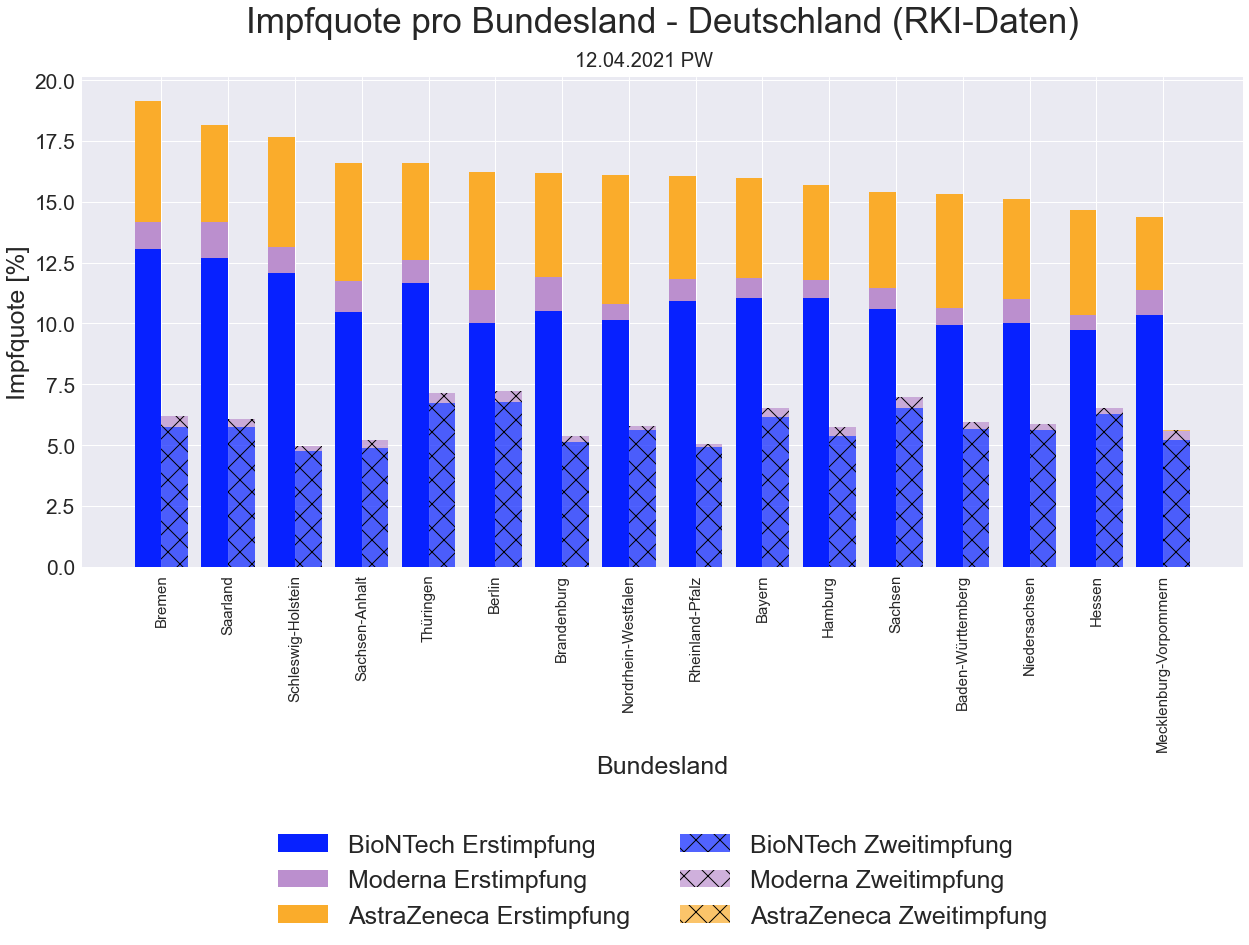

In [572]:
plt.figure(figsize=(h,v))

plt.style.use('seaborn')


w=0.40

x=df_I_EW["Bundesland"].tolist()
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]


p1 = plt.bar(x=bar1, height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Erstimpfung")

p2 = plt.bar(x=bar1, height=df_I_EW["Impfquote_Moderna_EI"], width = 0.4, 
             align = 'center', color = c_cz, 
             bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Moderna Erstimpfung")

p3 = plt.bar(x=bar1, height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.4, ###
             align = 'center', color = c_gb, 
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), 
             label = "AstraZeneca Erstimpfung")



p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_BioNTech_ZI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Zweitimpfung", hatch="x", alpha = 0.7)

p5 = plt.bar(x=bar2, height=df_I_EW["Impfquote_Moderna_ZI"], width = 0.4, 
             align = 'center', color = c_cz, hatch="x", alpha = 0.7,
             bottom=df_I_EW["Impfquote_BioNTech_ZI"], label = "Moderna Zweitimpfung")


p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
             align = 'center', color = c_gb, hatch="x", alpha = 0.7,
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
             label = "AstraZeneca Zweitimpfung")

# p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
#              align = 'center', color = c_gb, alpha =0.7
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
#              label = "AstraZeneca Zweitimpfung")






# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_ZI"], width = 0.4, 
#              align = 'center', color = c_at, 
#              label = "Impfquote Zweitimpfung")

# # Schriftgrößen x und y achsenwerte
plt.xticks(bar1+w/2, x,fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.yticks(np.arange(0, df_I_EW["Impfquote_EI"].max() +2.5 , 2.5))


plt.ylabel('Impfquote [%]', fontsize=size)
plt.xlabel('Bundesland', fontsize=size)

plt.title('Impfquote pro Bundesland - Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.5),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

In [573]:
# # def y_axis_thousands(x, pos):
# #    # 'The two args are the value and tick position'
# #     return '{:0,d}'.format(int(x)).replace(",",".")
# # formatter = FuncFormatter(y_axis_thousands)


# # fig = plt.figure(figsize=(h,v))
# # ax = fig.add_subplot()
# # ax.yaxis.set_major_formatter(formatter)

# plt.figure(figsize=(h,v))

# plt.style.use('seaborn')

# p1 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.9, 
#              align = 'center', color = c_ger, label = "Impfquote BioNTech Erstimpfung")

# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_ZI"], width = 0.9, 
#              align = 'center', color = c_at, 
#              bottom=np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]) + np.array(df_I_EW["Impfquote_AstraZeneca_EI"]), 
#              label = "Impfquote Zweitimpfung")

# # # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.yticks(np.arange(0, df_I_EW["Impfquote_EI_ZI"].max() +0.5 , 0.5))


# plt.ylabel('Anteil verabreichte Dosen [%]', fontsize=size)
# plt.xlabel('Bundesland', fontsize=size)

# plt.title('Anteil verabreichte Dosen - Deutschland (RKI-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=2, 
#            fontsize=size)

# # plt.text(x, y, f'Anteil verabreichte Dosen Deutschland : {Impfquote_ger}%\n (Verabreichte Dosen)', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})


# # korrigierte Hochrechnung mit exp model machen 
# # plt.text(x, y, f'grobe Hochrechnung: 60% der Bevölkerung geimpft in \nca. {Herdenimmun} Jahren.\nImpfquote Deutschland: {Impfquote_ger}%', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

# plt.show()
# #plt.show()

### df_I_EW (Impfquote)

In [574]:
# #df_I_EW.head(1)

In [575]:
# # Timeseries gestern einlesen
# df_I_timeseries1 = pd.read_csv('D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\output\\Dataframes\\df_I_timeseries.csv')

In [576]:
#df_I_EW.head(3)

### Berechnung Herdeinimmunität

In [577]:
df_I_EW

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,Moderna_ZI,Impfquote_Moderna_ZI,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
4,Bremen,681202.0,89018,13.0678,7611,1.11729,33858,4.97033,39125,5.74352,3038,0.445976,4,0.000587197,130487,19.1554,42167,6.19009,172654,25.3455
11,Saarland,986887.0,125361,12.7027,14354,1.45447,39472,3.99965,56494,5.72446,3269,0.331244,10,0.00101329,179187,18.1568,59773,6.05672,238960,24.2135
14,Schleswig-Holstein,2903773.0,350066,12.0556,31885,1.09805,131138,4.51612,138420,4.7669,5704,0.196434,171,0.00588889,513089,17.6697,144295,4.96922,657384,22.639
13,Sachsen-Anhalt,2194782.0,229909,10.4753,27721,1.26304,106858,4.86873,107138,4.88149,7445,0.339214,10,0.000455626,364488,16.607,114593,5.22116,479081,21.8282
15,Thüringen,2133378.0,249176,11.6799,20048,0.93973,84764,3.97323,143637,6.73284,8857,0.415163,13,0.000609362,353988,16.5928,152507,7.14862,506495,23.7415
2,Berlin,3669491.0,367340,10.0107,49760,1.35605,177904,4.84819,247881,6.75519,17633,0.48053,17,0.00046328,595004,16.2149,265531,7.23618,860535,23.4511
3,Brandenburg,2521893.0,265508,10.5281,34568,1.37072,108240,4.29201,128832,5.10854,7082,0.280821,8,0.000317222,408316,16.1909,135922,5.38968,544238,21.5805
9,Nordrhein-Westfalen,17947221.0,1821925,10.1516,115597,0.644094,954597,5.31891,1006086,5.6058,32030,0.178468,1295,0.0072156,2892119,16.1146,1039411,5.79149,3931530,21.9061
10,Rheinland-Pfalz,4093903.0,447157,10.9225,36195,0.88412,174611,4.26515,201586,4.92405,4563,0.111458,117,0.00285791,657963,16.0718,206266,5.03837,864229,21.1101
1,Bayern,13124737.0,1450800,11.0539,106337,0.810203,538697,4.10444,808706,6.16169,45290,0.345074,136,0.00103621,2095834,15.9686,854132,6.5078,2949966,22.4764


In [578]:

# Impfstart = datetime.strptime('28.12.2020', '%d.%m.%Y')
# Tage_seit_Impfstart = (now-Impfstart).days
Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
# Impfgeschwindigkeit = (1/2)*Summe_Impfungen/Tage_seit_Impfstart
# Impfgeschwindigkeit_gestern = (1/2)*df_I_EW["Differenz zum Vortag"].sum()

# if Impfgeschwindigkeit_gestern > Impfgeschwindigkeit:
#     Impfgeschwindigkeit = (Impfgeschwindigkeit*0.2 + Impfgeschwindigkeit_gestern*0.8)
#     print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} IF-Statement')

# Herdenimmun = round((1/12)*(1/30)*(E_ger*0.6)*(1/(Impfgeschwindigkeit)),1)   # grobe Schätzung Zeit bis Herdenimmun



# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')   # wie lange schon geimpft wird
print(f'Summe_Impfungen = {Summe_Impfungen}')
# print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} Mittelwert')
# print(f'Impfgeschwindigkeit_gestern = {Impfgeschwindigkeit_gestern}')
# print(f'E_ger = {E_ger}')   # Einwohner Deutschland
# print(f'Herdenimmun = {Herdenimmun} Jahren')

Summe_Impfungen = 18205653


In [579]:
# v=s/t    v = 83020000*0.6 / t

Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
print(f'Summe_Impfungen  = {Summe_Impfungen} Impfungen\n')


Ende = datetime.strptime('01.10.2021', '%d.%m.%Y')
Tage_bis_Oktober = (Ende - now).days
print(f'Tage_bis_Oktober = {Tage_bis_Oktober} Tage\n')

Impfungen80 = 2*(E_ger*0.8) - Summe_Impfungen
SOLL_Impfungen80 = int(Impfungen80*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen80 = {SOLL_Impfungen80} Impfungen pro Tag')
print(f'Impfungen80 = {Impfungen80} Impfungen\n')

Impfungen60 = 2*(E_ger*0.6) - Summe_Impfungen
SOLL_Impfungen60 = int(Impfungen60*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen60 = {SOLL_Impfungen60} Impfungen pro Tag')
print(f'Impfungen60 = {Impfungen60} Impfungen\n')

Impfungen30 = 2*(E_ger*0.3) - Summe_Impfungen
SOLL_Impfungen30 = int(Impfungen30*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen30 = {SOLL_Impfungen30} Impfungen pro Tag')
print(f'Impfungen30 = {Impfungen30} Impfungen\n')

Impfungen15 = 2*(E_ger*0.15) - Summe_Impfungen
SOLL_Impfungen15 = int(Impfungen15*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen15 = {SOLL_Impfungen15} Impfungen pro Tag')
print(f'Impfungen15 = {Impfungen15} Impfungen\n')

# Impfungen5 = 2*(E_ger*0.05) - Summe_Impfungen
# SOLL_Impfungen5 = int(Impfungen5*(1/Tage_bis_Oktober))
# print(f'SOLL_Impfungen5 = {SOLL_Impfungen5} Impfungen pro Tag')
# print(f'Impfungen5 = {Impfungen5} Impfungen\n')


Summe_Impfungen  = 18205653 Impfungen

Tage_bis_Oktober = 171 Tage

SOLL_Impfungen80 = 670329 Impfungen pro Tag
Impfungen80 = 114626347.0 Impfungen

SOLL_Impfungen60 = 476130 Impfungen pro Tag
Impfungen60 = 81418347.0 Impfungen

SOLL_Impfungen30 = 184832 Impfungen pro Tag
Impfungen30 = 31606347.0 Impfungen

SOLL_Impfungen15 = 39183 Impfungen pro Tag
Impfungen15 = 6700347.0 Impfungen



## Herdenimmunität Exponentialmodell

In [580]:
#df_I_EW

In [581]:
# # P = I*(1+v)^t 
# # t = ln(P/I) * ( 1 / ln(1+v) )
# # wobei P die ZIEL geimpften, I die heute geimpften, v der Wachstumsfaktor und t die Zeit ist

# Ziel_Geimpfte = E_ger*0.6
# print(f'Ziel_Geimpfte {Ziel_Geimpfte}')

# Geimpfte_Heute = df_I_EW["Summe_EI_ZI"].sum()
# print(f'Geimpfte_Heute= {Geimpfte_Heute}')

# Wachstumsfaktor = (1/10) * df_I_TS["Summe_EI_ZI"].iloc[-1] / df_I_TS["Summe_EI_ZI"].iloc[-10]
# print(f'Wachstumsfaktor = {Wachstumsfaktor}')

# ##########################################################

# Anzahl_Impfzentren = 400
# Impfungen_pro_Tag_MAX = 400 * 1000

# Tage_seit_Impfstart
# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')

# # logistic = MAX / (1+e^(-v*(x-x0))

# Zeit_Herdenimmun = np.log(Ziel_Geimpfte/Geimpfte_Heute) / (np.log(1+Wachstumsfaktor))
# print(f'Zeit_Herdenimmun = {Zeit_Herdenimmun}')

## df_I_TS Impfungen Timeseries

In [582]:
# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][3]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen
sheet_name

# Datenimport Impfungen
df_I_TS = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:C")

df_I_TS = df_I_TS[:-6]   # drop last row
df_I_TS = df_I_TS.dropna(axis=0, how='any', thresh = 2)   # drop rows with more than 2 NaN values
df_I_TS['Zweitimpfung'] = df_I_TS['Zweitimpfung'].fillna(0)

df_I_TS['Summe_EI_ZI'] = df_I_TS['Erstimpfung'] + df_I_TS['Zweitimpfung']

# df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].ewm(alpha=0.5, adjust=False).mean()
df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).mean()

df_I_TS['MSTD_Impfungen'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).std()

df_I_TS['OTG_Impfungen'] = df_I_TS['MA'] + df_I_TS['MSTD_Impfungen']
df_I_TS['UTG_Impfungen'] = df_I_TS['MA'] - df_I_TS['MSTD_Impfungen']

df_I_TS['SOLL_Impfungen80'] = SOLL_Impfungen80
df_I_TS['SOLL_Impfungen60'] = SOLL_Impfungen60
df_I_TS['SOLL_Impfungen30'] = SOLL_Impfungen30
df_I_TS['SOLL_Impfungen15'] = SOLL_Impfungen15
# df_I_TS['SOLL_Impfungen5'] = SOLL_Impfungen5

df_I_TS['cumsum_EI'] = df_I_TS['Erstimpfung'].cumsum()
df_I_TS['cumsum_ZI'] = df_I_TS['Zweitimpfung'].cumsum()

df_I_TS = df_I_TS.loc[df_I_TS.Erstimpfung >0, :] # nur Erstimpfungen > 0 anzeigen
#df_I_TS

In [583]:
df_I_TS

,Datum,Erstimpfung,Zweitimpfung,Summe_EI_ZI,MA,MSTD_Impfungen,OTG_Impfungen,UTG_Impfungen,SOLL_Impfungen80,SOLL_Impfungen60,SOLL_Impfungen30,SOLL_Impfungen15,cumsum_EI,cumsum_ZI
0,2020-12-27 00:00:00,24159.0,0.0,24159.0,24159.000000,NaN,NaN,NaN,670329,476130,184832,39183,24159.0,0.0
1,2020-12-28 00:00:00,18384.0,0.0,18384.0,21271.500000,4083.541661,25355.041661,17187.958339,670329,476130,184832,39183,42543.0,0.0
2,2020-12-29 00:00:00,48118.0,0.0,48118.0,30220.333333,15766.499622,45986.832955,14453.833711,670329,476130,184832,39183,90661.0,0.0
3,2020-12-30 00:00:00,61490.0,0.0,61490.0,38037.750000,20252.646418,58290.396418,17785.103582,670329,476130,184832,39183,152151.0,0.0
4,2020-12-31 00:00:00,49241.0,0.0,49241.0,40278.400000,18240.883402,58519.283402,22037.516598,670329,476130,184832,39183,201392.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-04-06 00:00:00,276303.0,98214.0,374517.0,275041.714286,66489.235602,341530.949887,208552.478684,670329,476130,184832,39183,10993355.0,4656451.0
101,2021-04-07 00:00:00,573648.0,94523.0,668171.0,322856.571429,164143.335755,486999.907183,158713.235674,670329,476130,184832,39183,11567003.0,4750974.0
102,2021-04-08 00:00:00,630648.0,87236.0,717884.0,380161.714286,221615.435281,601777.149567,158546.279004,670329,476130,184832,39183,12197651.0,4838210.0
103,2021-04-09 00:00:00,516495.0,82790.0,599285.0,433265.714286,223482.653591,656748.367877,209783.060694,670329,476130,184832,39183,12714146.0,4921000.0


In [584]:
# # Impfungen sheet_name der Datenquelle auslesen
# df_I_sheet = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx", None)
# sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
# sheet_name = [*sheet_name][2]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen

# # Datenimport Impfungen
# df_I_TS = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx",
#                     sheet_name = sheet_name,
#                     usecols="A:B")



#gleitender Mittelwert der cases und deaths, 7 Tage
# df_I_TS['MA'] = df_I_TS['Gesamtzahl Impfungen'].rolling(window=7,min_periods=1, center = False).mean()


# Date_reported in eine Datumsspalte umwandeln
#df_I_TS['Datum der Impfung'] = pd.to_datetime(df_I_TS.Date_reported, utc=True)
#df_I_TS = df_I_TS.dropna(axis=0, how='any')
#df_I_TS = df_I_TS[df_I_TS.Datum != 'Impfungen gesamt']

## RKI - Impfungen Timeseries

In [585]:
#df_I_TS.head(5)

## 7-2 Anzahl Impfungen - SOLL Impfungen - Timeseries

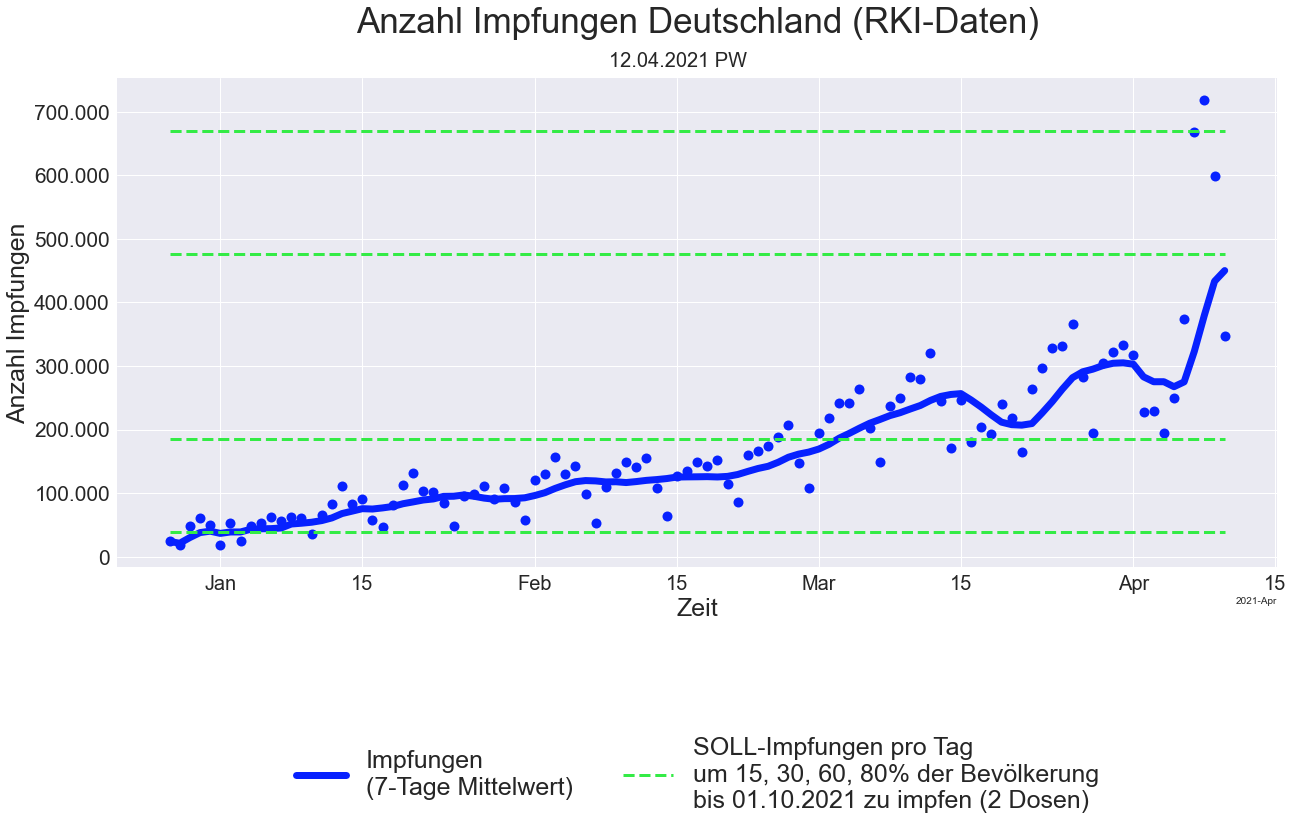

In [586]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


# ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
#              label = "Impfungen\n(7-Tage Mittel)") # blau, linie, dick

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

# ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="+- 1 sigma")
# ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

ax5 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen80'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "SOLL-Impfungen pro Tag\num 15, 30, 60, 80% der Bevölkerung\nbis 01.10.2021 zu impfen (2 Dosen)")


ax6 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen60'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

ax7 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen30'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

ax8 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen15'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_2, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_2, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## 7-3 Timeseries 

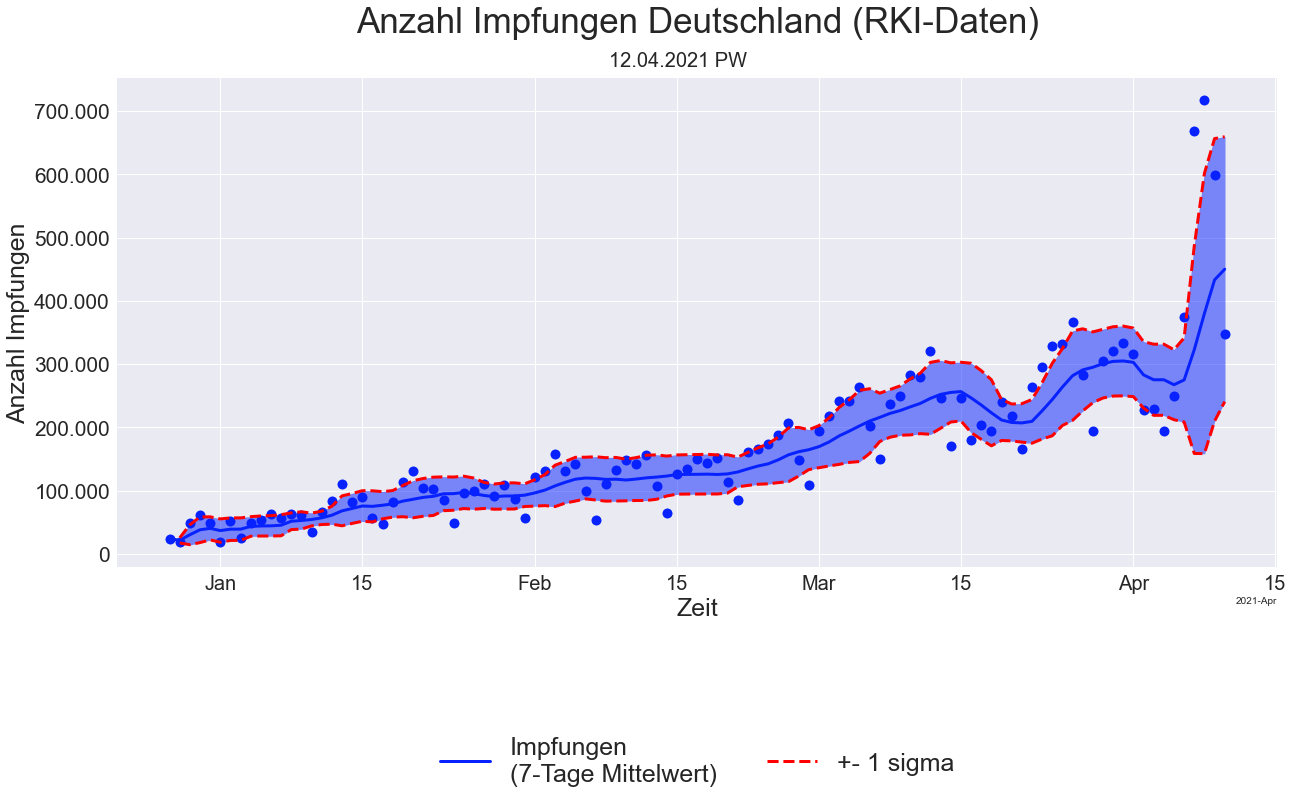

In [587]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)

fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color=c_ger, linestyle = 'solid', linewidth = lws, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="+- 1 sigma")

ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# # fill area between lines
plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color=c_ger,alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_3, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_3, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## Anzahl Impfungen kumuliert

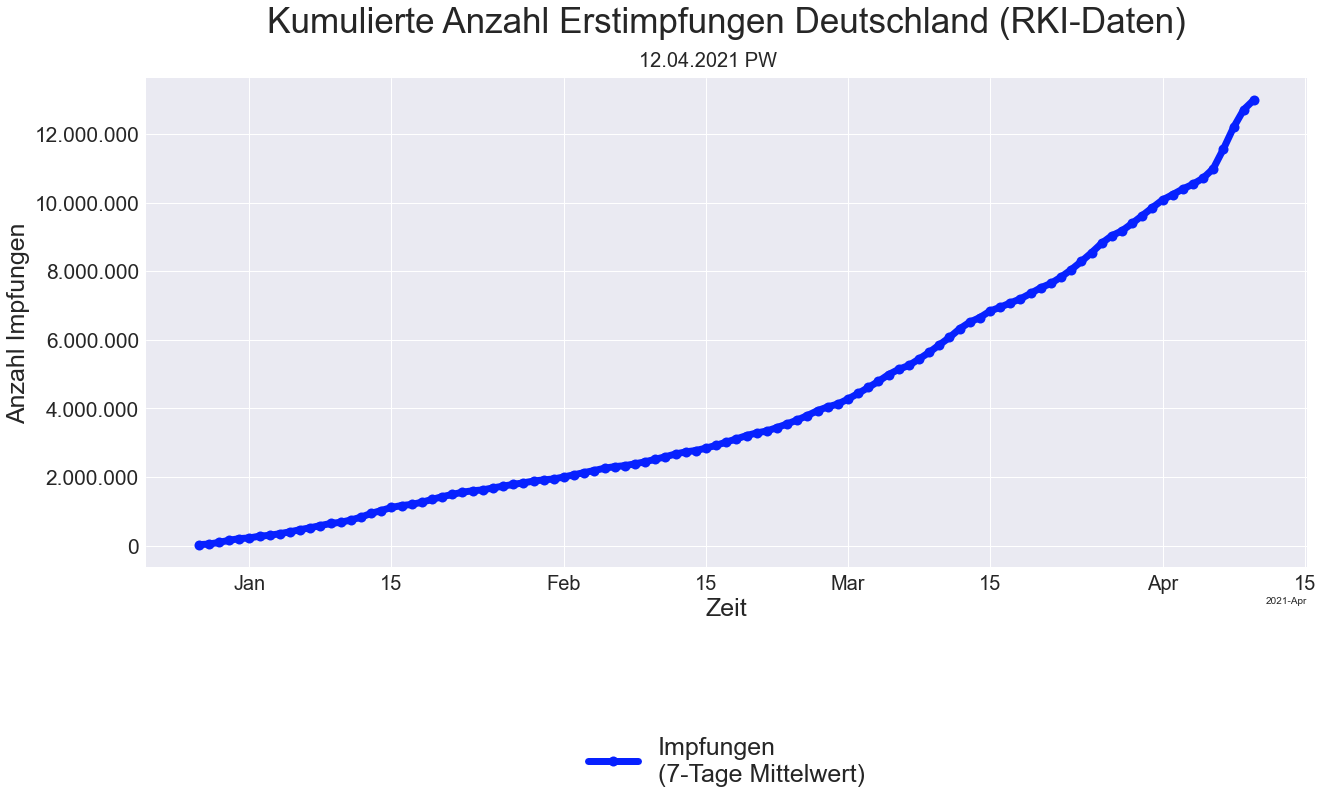

In [588]:
def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Kumulierte Anzahl Erstimpfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_4, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_4, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## dataframes speichern

In [589]:
df_EW.to_csv(Laufwerk + pfad_output + name_output_df_EW, index=False)
df_I.to_csv(Laufwerk + pfad_output + name_output_df_I, index=False)
df_I_EW.to_csv(Laufwerk + pfad_output + name_output_df_I_EW, index=False)
df_I_TS.to_csv(Laufwerk + pfad_output + name_output_df_I_TS, index=False)
# df_VOC.to_csv(Laufwerk + pfad_output + name_output_df_VOC, index=False)




## Performance messen

In [590]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 5.57 seconds
